## Power monitor readings for all finetuning training

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [2]:
df_reading = pd.read_csv("results/finetune_pm.csv")

In [4]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [12]:
df_time_interval = pd.read_csv("results/result_final.csv")

In [13]:
df_time_interval.columns

Index(['dataset', 'batchsize', 'max_seq_len', 'mean_power', 'total_time',
       'power', 'summed_power', 'gpu_util', 'gpu1_util', 'gpu2_util',
       'gpu1_mean_power', 'gpu2_mean_power', 'memory_util', 'memory_used',
       'start_time', 'end_time', 'dataset_size', 'total_batchsize',
       'samples_per_sec', 'time_per_sample'],
      dtype='object')

In [14]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,memory_util,memory_used,start_time,end_time,dataset_size,total_batchsize,samples_per_sec,time_per_sample,start_seconds,end_seconds
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,29.387097,4707.870968,2020-06-19 16:13:45.856,2020-06-19 16:14:01.978,635,64,118.161518,0.008463,2020-06-19 15:13:45.856,2020-06-19 15:14:01.978
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,38.238929,6151.259526,2020-06-13 15:58:07.779,2020-06-13 16:06:21.295,67349,32,409.403140,0.002443,2020-06-13 14:58:07.779,2020-06-13 15:06:21.295
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,34.264901,4803.768212,2020-06-13 20:27:00.615,2020-06-13 20:28:17.789,3668,56,142.586882,0.007013,2020-06-13 19:27:00.615,2020-06-13 19:28:17.789
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,38.279070,8139.453488,2020-06-22 10:42:08.666,2020-06-22 10:42:52.159,2490,128,171.751776,0.005822,2020-06-22 09:42:08.666,2020-06-22 09:42:52.159
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,38.661692,8401.965174,2020-06-22 10:44:57.767,2020-06-22 10:46:40.271,5749,128,168.256849,0.005943,2020-06-22 09:44:57.767,2020-06-22 09:46:40.271


In [15]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]

In [16]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()

In [17]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'pm_mean_power'] = power_mean(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [19]:
df_time_interval['pm_power'] = (df_time_interval['pm_mean_power'] * df_time_interval['total_time']) / (1000 * 3600)
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,samples_per_sec,time_per_sample,start_seconds,end_seconds,s_date,e_date,s_time,e_time,pm_mean_power,pm_power
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,118.161518,0.008463,2020-06-19 15:13:45.856,2020-06-19 15:14:01.978,2020-06-19,2020-06-19,15:13:45,15:14:01,386.649167,0.001732
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,409.403140,0.002443,2020-06-13 14:58:07.779,2020-06-13 15:06:21.295,2020-06-13,2020-06-13,14:58:07,15:06:21,542.597836,0.074384
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,142.586882,0.007013,2020-06-13 19:27:00.615,2020-06-13 19:28:17.789,2020-06-13,2020-06-13,19:27:00,19:28:17,511.313231,0.010961
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,171.751776,0.005822,2020-06-22 09:42:08.666,2020-06-22 09:42:52.159,2020-06-22,2020-06-22,09:42:08,09:42:52,548.885000,0.006631
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,168.256849,0.005943,2020-06-22 09:44:57.767,2020-06-22 09:46:40.271,2020-06-22,2020-06-22,09:44:57,09:46:40,553.509829,0.015760


slope 0.002786735434322657 
intercept 0.008525631680772652
r_value 0.9858755550378621
p_value 2.5547329522815893e-30
std_err 7.782775261585367e-05
R squared  0.9719506100212126


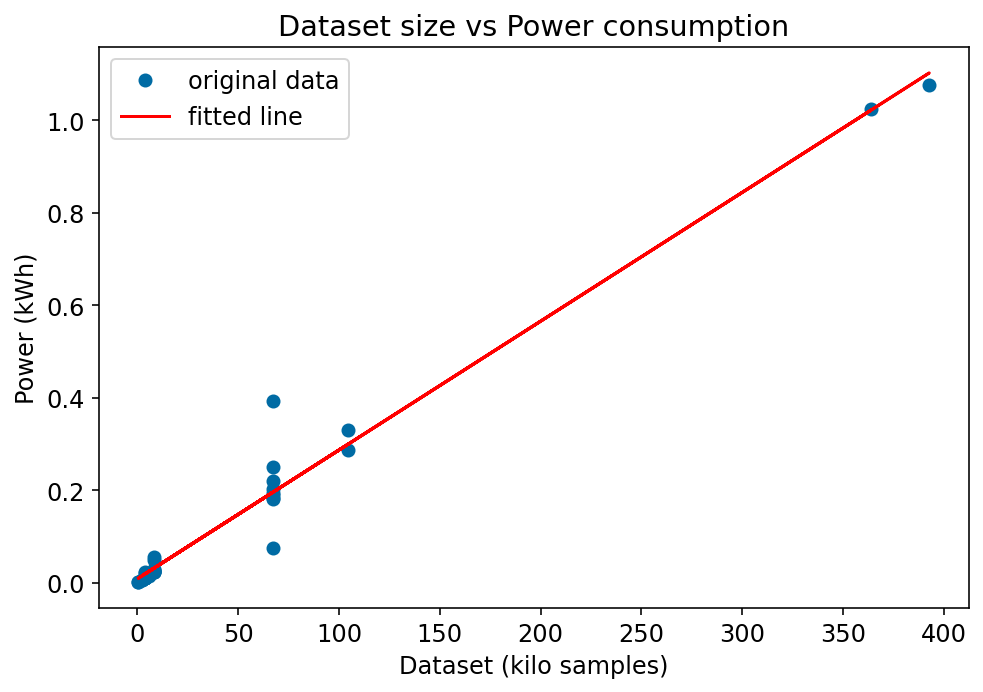

In [21]:
from scipy import stats
x = df_time_interval['dataset_size'] /1000
y = df_time_interval["pm_power"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Dataset (kilo samples)")
plt.ylabel("Power (kWh)")
plt.title("Dataset size vs Power consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/dataVsPmPower.png',dpi=300)

slope -7.01168459837592e-05 
intercept 0.013764129555051569
r_value -0.9106376832449049
p_value 0.0006430276944281259
std_err 1.2025249990806118e-05
R squared  0.8292609901456478


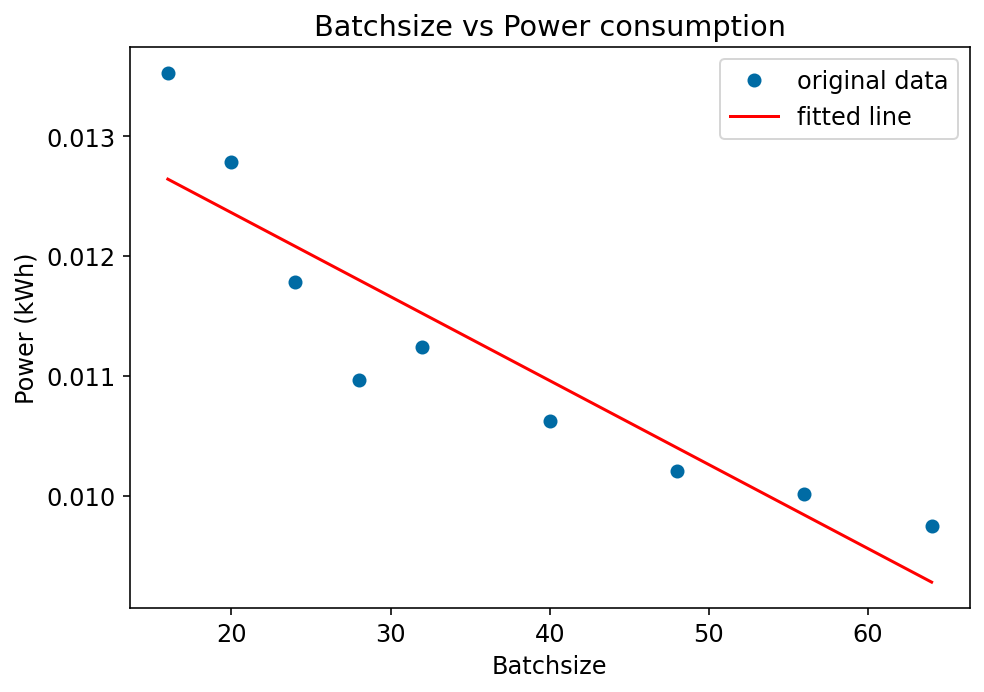

In [25]:
df_mrpc = df_time_interval.loc[(df_time_interval.dataset == 'MRPC') & (df_time_interval.max_seq_len == 128)]
df_mrpc =df_mrpc.sort_values('batchsize')
x = df_mrpc['batchsize']
y = df_mrpc["pm_power"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Batchsize")
plt.ylabel("Power (kWh)")
plt.title("Batchsize vs Power consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/batchVsPmPower.png',dpi=300)

In [26]:
df_time_interval.power - df_time_interval.pm_power

0    -0.000093
1    -0.016324
2    -0.002178
3    -0.001177
4    -0.002208
5    -0.041035
6    -0.044902
7    -0.003054
8    -0.010632
9    -0.003018
10   -0.001421
11   -0.219090
12   -0.002389
13   -0.002023
14   -0.012043
15   -0.005188
16   -0.005067
17   -0.001824
18   -0.003299
19   -0.080113
20   -0.001385
21   -0.000120
22   -0.002434
23   -0.007132
24   -0.004394
25   -0.039889
26   -0.052946
27   -0.043226
28   -0.054079
29   -0.058860
30   -0.032461
31   -0.075991
32   -0.004521
33   -0.001860
34   -0.002069
35   -0.005132
36   -0.216580
37   -0.005748
38   -0.005067
dtype: float64

In [27]:
df_time_interval

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,samples_per_sec,time_per_sample,start_seconds,end_seconds,s_date,e_date,s_time,e_time,pm_mean_power,pm_power
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,118.161518,0.008463,2020-06-19 15:13:45.856,2020-06-19 15:14:01.978,2020-06-19,2020-06-19,15:13:45,15:14:01,386.649167,0.001732
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,409.403140,0.002443,2020-06-13 14:58:07.779,2020-06-13 15:06:21.295,2020-06-13,2020-06-13,14:58:07,15:06:21,542.597836,0.074384
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,142.586882,0.007013,2020-06-13 19:27:00.615,2020-06-13 19:28:17.789,2020-06-13,2020-06-13,19:27:00,19:28:17,511.313231,0.010961
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,171.751776,0.005822,2020-06-22 09:42:08.666,2020-06-22 09:42:52.159,2020-06-22,2020-06-22,09:42:08,09:42:52,548.885000,0.006631
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,168.256849,0.005943,2020-06-22 09:44:57.767,2020-06-22 09:46:40.271,2020-06-22,2020-06-22,09:44:57,09:46:40,553.509829,0.015760
5,SST-2,56,128,222.548349,1151.970,0.142427,0.139278,95.185412,95.451642,94.919183,...,175.392588,0.005701,2020-06-15 00:11:57.344,2020-06-15 00:31:09.314,2020-06-15,2020-06-15,00:11:57,00:31:09,573.333813,0.183462
6,SST-2,24,128,207.307071,1518.205,0.174853,0.171662,91.829979,89.663313,93.996644,...,133.082818,0.007514,2020-06-14 23:03:01.213,2020-06-14 23:28:19.418,2020-06-14,2020-06-14,23:03:01,23:28:19,521.085957,0.219754
7,MRPC,20,128,193.060506,90.725,0.009731,0.009546,90.129213,85.404494,94.853933,...,121.289611,0.008245,2020-06-13 19:18:29.390,2020-06-13 19:20:00.115,2020-06-13,2020-06-13,19:18:29,19:20:00,507.307500,0.012785
8,CoLA,32,256,227.781566,311.942,0.039475,0.038786,95.155207,94.013029,96.297386,...,82.236441,0.012160,2020-06-12 14:12:46.791,2020-06-12 14:17:58.733,2020-06-12,2020-06-12,14:12:46,14:17:58,578.261500,0.050107
9,MRPC,16,128,185.643234,101.920,0.010512,0.010365,90.309505,84.099010,96.520000,...,107.967033,0.009262,2020-06-22 12:25:43.190,2020-06-22 12:27:25.110,2020-06-22,2020-06-22,12:25:43,12:27:25,477.882324,0.013529
